In [ ]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib tqdm flask

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tqdm import tqdm
import tensorflow as tf

2022-05-15 23:17:38.087284: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/Thesis/Thesis2022/my_project/venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-05-15 23:17:38.087300: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

def draw_styled_landmarks(image, results):
    # Draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
    #                         mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                         mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                         ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(0,246,205), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(7,0,219), thickness=1, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )     



In [4]:
cap = cv2.VideoCapture(-1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.9, min_tracking_confidence=0.9) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        print(type(frame))
        print(frame.shape)
        print(frame)
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(type(results))
        print(results)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'numpy.ndarray'>
(480, 640, 3)
[[[245 255 255]
  [245 255 255]
  [245 255 255]
  ...
  [152 199 209]
  [137 198 206]
  [140 201 209]]

 [[245 255 255]
  [245 255 255]
  [249 255 255]
  ...
  [149 194 209]
  [140 194 204]
  [142 195 205]]

 [[245 255 255]
  [245 255 255]
  [249 255 255]
  ...
  [150 196 207]
  [142 196 203]
  [140 195 202]]

 ...

 [[  0  11   0]
  [  0   8   0]
  [  0   7   0]
  ...
  [  2   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0  10   0]
  [  0   7   0]
  [  0   7   0]
  ...
  [  0   0   0]
  [  0   2   0]
  [  0   2   0]]

 [[  0  11   0]
  [  0   8   0]
  [  0  10   0]
  ...
  [  0   0   0]
  [  0   1   0]
  [  0   1   0]]]
<class 'type'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'numpy.ndarray'>
(480, 640, 3)
[[[255 255 255]
  [255 255 255]
  [249 255 255]
  ...
  [171 192 204]
  [173 190 215]
  [176 192 217]]

 [[251 255 255]
  [251 255 255]
  [251 255 255]
  ...
  [172 193 206]
  [175 193 213]
  [176 194 214]]

 [[251 255 255

<class 'numpy.ndarray'>
(480, 640, 3)
[[[237 255 255]
  [237 255 255]
  [229 255 255]
  ...
  [162 175 198]
  [157 175 197]
  [152 170 192]]

 [[237 255 255]
  [237 255 255]
  [231 255 255]
  ...
  [154 174 196]
  [151 173 194]
  [150 172 193]]

 [[237 255 255]
  [237 255 255]
  [231 255 255]
  ...
  [144 174 187]
  [136 174 183]
  [142 179 189]]

 ...

 [[  0   3   2]
  [  0   3   2]
  [  0   3   2]
  ...
  [  0   0   2]
  [  0   0   2]
  [  0   0   2]]

 [[  0   3   2]
  [  0   3   2]
  [  0   3   2]
  ...
  [  0   0   2]
  [  0   2   0]
  [  0   2   0]]

 [[  0   3   2]
  [  0   3   2]
  [  0   3   2]
  ...
  [  0   0   2]
  [  0   2   0]
  [  0   2   0]]]
<class 'type'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'numpy.ndarray'>
(480, 640, 3)
[[[211 255 255]
  [211 255 255]
  [209 255 255]
  ...
  [106 171 188]
  [104 173 185]
  [105 174 186]]

 [[211 255 255]
  [211 255 255]
  [209 255 255]
  ...
  [124 182 198]
  [118 182 190]
  [114 177 185]]

 [[211 255 255

<class 'numpy.ndarray'>
(480, 640, 3)
[[[213 255 255]
  [213 255 255]
  [217 255 255]
  ...
  [156 179 184]
  [153 178 183]
  [152 177 182]]

 [[217 255 255]
  [217 255 255]
  [217 255 255]
  ...
  [156 179 184]
  [150 176 181]
  [150 176 181]]

 [[217 255 255]
  [217 255 255]
  [217 255 255]
  ...
  [147 175 180]
  [146 171 178]
  [147 172 179]]

 ...

 [[  0   1   0]
  [  0   1   0]
  [  0   1   0]
  ...
  [  0   2   0]
  [  0   2   0]
  [  0   2   0]]

 [[  0   2   0]
  [  0   2   0]
  [  0   2   0]
  ...
  [  0   1   0]
  [  0   2   0]
  [  0   2   0]]

 [[  0   2   0]
  [  0   2   0]
  [  0   2   0]
  ...
  [  0   2   0]
  [  0   2   0]
  [  0   2   0]]]
<class 'type'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'numpy.ndarray'>
(480, 640, 3)
[[[213 255 255]
  [213 255 255]
  [219 255 255]
  ...
  [147 176 198]
  [149 187 203]
  [135 173 189]]

 [[219 255 255]
  [219 255 255]
  [219 255 255]
  ...
  [145 175 193]
  [141 176 193]
  [127 162 179]]

 [[223 255 255

In [10]:
len(frame.flatten())

921600

In [4]:
cap.release()
cv2.destroyAllWindows()

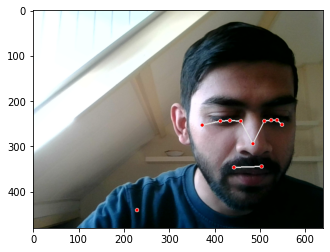

In [4]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [3]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]) \
    .flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]) \
    .flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]) \
    .flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]) \
    .flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([pose, face, lh, rh]), lh, rh

In [5]:
results

mediapipe.python.solution_base.SolutionOutputs

In [5]:
DATA_PATH = os.path.join('SLR_T_DATA')

actions = np.array(['Positive', 'Negative', 'Neutral']) ### for SLR_T_DATA folder

In [6]:
# stores number of videos for each action.
no_sequences = 60 #5 #

# stores number of frames per video
sequence_length = 50

start_folder = 1 

In [34]:
for action in actions: 
    if os.path.exists(os.path.join(DATA_PATH, action)):
        dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    else:
        dirmax = 0
    
    for sequence in range(1,no_sequences+1):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

In [38]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    
                
                # NEW Export keypoints
                keypoints, lh,rh = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            cv2.waitKey(1000)
                    
    cap.release()
    cv2.destroyAllWindows()

In [30]:
cap.release()
cv2.destroyAllWindows()

In [7]:
start_folder

1

In [10]:
NEW_DATA_PATH = os.path.join('SLR_HAND_DATA')

In [21]:


for action in os.listdir(DATA_PATH):
    for seq in os.listdir(os.path.join(DATA_PATH, action)):
        for frame in os.listdir(os.path.join(DATA_PATH,action,seq)):
            print(action, seq, frame)
            tt = np.load(os.path.join(DATA_PATH,action,seq,frame))
            #print(tt)
            frame_num = frame.split('.')[0]
            keypoints = tt[-126:]
            
            if os.path.exists(os.path.join(NEW_DATA_PATH, action, seq)):
                npy_path = os.path.join(NEW_DATA_PATH, action, seq, frame_num)
                np.save(npy_path, keypoints)
            else:
                os.makedirs(os.path.join(NEW_DATA_PATH, action, seq))
                npy_path = os.path.join(NEW_DATA_PATH, action, seq, frame_num)
                np.save(npy_path, keypoints)
            
            #break
        #break
    #break
    

No 36 43.npy
No 36 2.npy
No 36 49.npy
No 36 20.npy
No 36 22.npy
No 36 46.npy
No 36 36.npy
No 36 44.npy
No 36 9.npy
No 36 5.npy
No 36 35.npy
No 36 45.npy
No 36 23.npy
No 36 42.npy
No 36 40.npy
No 36 14.npy
No 36 37.npy
No 36 4.npy
No 36 28.npy
No 36 13.npy
No 36 11.npy
No 36 3.npy
No 36 12.npy
No 36 17.npy
No 36 21.npy
No 36 16.npy
No 36 47.npy
No 36 25.npy
No 36 29.npy
No 36 1.npy
No 36 15.npy
No 36 27.npy
No 36 7.npy
No 36 33.npy
No 36 39.npy
No 36 26.npy
No 36 8.npy
No 36 34.npy
No 36 31.npy
No 36 32.npy
No 36 41.npy
No 36 24.npy
No 36 48.npy
No 36 30.npy
No 36 18.npy
No 36 6.npy
No 36 10.npy
No 36 19.npy
No 36 0.npy
No 36 38.npy
No 27 43.npy
No 27 2.npy
No 27 49.npy
No 27 20.npy
No 27 22.npy
No 27 46.npy
No 27 36.npy
No 27 44.npy
No 27 9.npy
No 27 5.npy
No 27 35.npy
No 27 45.npy
No 27 23.npy
No 27 42.npy
No 27 40.npy
No 27 14.npy
No 27 37.npy
No 27 4.npy
No 27 28.npy
No 27 13.npy
No 27 11.npy
No 27 3.npy
No 27 12.npy
No 27 17.npy
No 27 21.npy
No 27 16.npy
No 27 47.npy
No 27 25.npy
N

No 53 2.npy
No 53 49.npy
No 53 20.npy
No 53 22.npy
No 53 46.npy
No 53 36.npy
No 53 44.npy
No 53 9.npy
No 53 5.npy
No 53 35.npy
No 53 45.npy
No 53 23.npy
No 53 42.npy
No 53 40.npy
No 53 14.npy
No 53 37.npy
No 53 4.npy
No 53 28.npy
No 53 13.npy
No 53 11.npy
No 53 3.npy
No 53 12.npy
No 53 17.npy
No 53 21.npy
No 53 16.npy
No 53 47.npy
No 53 25.npy
No 53 29.npy
No 53 1.npy
No 53 15.npy
No 53 27.npy
No 53 7.npy
No 53 33.npy
No 53 39.npy
No 53 26.npy
No 53 8.npy
No 53 34.npy
No 53 31.npy
No 53 32.npy
No 53 41.npy
No 53 24.npy
No 53 48.npy
No 53 30.npy
No 53 18.npy
No 53 6.npy
No 53 10.npy
No 53 19.npy
No 53 0.npy
No 53 38.npy
No 17 43.npy
No 17 2.npy
No 17 49.npy
No 17 20.npy
No 17 22.npy
No 17 46.npy
No 17 36.npy
No 17 44.npy
No 17 9.npy
No 17 5.npy
No 17 35.npy
No 17 45.npy
No 17 23.npy
No 17 42.npy
No 17 40.npy
No 17 14.npy
No 17 37.npy
No 17 4.npy
No 17 28.npy
No 17 13.npy
No 17 11.npy
No 17 3.npy
No 17 12.npy
No 17 17.npy
No 17 21.npy
No 17 16.npy
No 17 47.npy
No 17 25.npy
No 17 29.npy
N

No 23 47.npy
No 23 25.npy
No 23 29.npy
No 23 1.npy
No 23 15.npy
No 23 27.npy
No 23 7.npy
No 23 33.npy
No 23 39.npy
No 23 26.npy
No 23 8.npy
No 23 34.npy
No 23 31.npy
No 23 32.npy
No 23 41.npy
No 23 24.npy
No 23 48.npy
No 23 30.npy
No 23 18.npy
No 23 6.npy
No 23 10.npy
No 23 19.npy
No 23 0.npy
No 23 38.npy
No 59 43.npy
No 59 2.npy
No 59 49.npy
No 59 20.npy
No 59 22.npy
No 59 46.npy
No 59 36.npy
No 59 44.npy
No 59 9.npy
No 59 5.npy
No 59 35.npy
No 59 45.npy
No 59 23.npy
No 59 42.npy
No 59 40.npy
No 59 14.npy
No 59 37.npy
No 59 4.npy
No 59 28.npy
No 59 13.npy
No 59 11.npy
No 59 3.npy
No 59 12.npy
No 59 17.npy
No 59 21.npy
No 59 16.npy
No 59 47.npy
No 59 25.npy
No 59 29.npy
No 59 1.npy
No 59 15.npy
No 59 27.npy
No 59 7.npy
No 59 33.npy
No 59 39.npy
No 59 26.npy
No 59 8.npy
No 59 34.npy
No 59 31.npy
No 59 32.npy
No 59 41.npy
No 59 24.npy
No 59 48.npy
No 59 30.npy
No 59 18.npy
No 59 6.npy
No 59 10.npy
No 59 19.npy
No 59 0.npy
No 59 38.npy
No 1 43.npy
No 1 2.npy
No 1 49.npy
No 1 20.npy
No 1 2

No 44 47.npy
No 44 25.npy
No 44 29.npy
No 44 1.npy
No 44 15.npy
No 44 27.npy
No 44 7.npy
No 44 33.npy
No 44 39.npy
No 44 26.npy
No 44 8.npy
No 44 34.npy
No 44 31.npy
No 44 32.npy
No 44 41.npy
No 44 24.npy
No 44 48.npy
No 44 30.npy
No 44 18.npy
No 44 6.npy
No 44 10.npy
No 44 19.npy
No 44 0.npy
No 44 38.npy
No 50 43.npy
No 50 2.npy
No 50 49.npy
No 50 20.npy
No 50 22.npy
No 50 46.npy
No 50 36.npy
No 50 44.npy
No 50 9.npy
No 50 5.npy
No 50 35.npy
No 50 45.npy
No 50 23.npy
No 50 42.npy
No 50 40.npy
No 50 14.npy
No 50 37.npy
No 50 4.npy
No 50 28.npy
No 50 13.npy
No 50 11.npy
No 50 3.npy
No 50 12.npy
No 50 17.npy
No 50 21.npy
No 50 16.npy
No 50 47.npy
No 50 25.npy
No 50 29.npy
No 50 1.npy
No 50 15.npy
No 50 27.npy
No 50 7.npy
No 50 33.npy
No 50 39.npy
No 50 26.npy
No 50 8.npy
No 50 34.npy
No 50 31.npy
No 50 32.npy
No 50 41.npy
No 50 24.npy
No 50 48.npy
No 50 30.npy
No 50 18.npy
No 50 6.npy
No 50 10.npy
No 50 19.npy
No 50 0.npy
No 50 38.npy
No 47 43.npy
No 47 2.npy
No 47 49.npy
No 47 20.npy
No

Negative 20 31.npy
Negative 20 32.npy
Negative 20 41.npy
Negative 20 24.npy
Negative 20 48.npy
Negative 20 30.npy
Negative 20 18.npy
Negative 20 6.npy
Negative 20 10.npy
Negative 20 19.npy
Negative 20 0.npy
Negative 20 38.npy
Negative 28 43.npy
Negative 28 2.npy
Negative 28 49.npy
Negative 28 20.npy
Negative 28 22.npy
Negative 28 46.npy
Negative 28 36.npy
Negative 28 44.npy
Negative 28 9.npy
Negative 28 5.npy
Negative 28 35.npy
Negative 28 45.npy
Negative 28 23.npy
Negative 28 42.npy
Negative 28 40.npy
Negative 28 14.npy
Negative 28 37.npy
Negative 28 4.npy
Negative 28 28.npy
Negative 28 13.npy
Negative 28 11.npy
Negative 28 3.npy
Negative 28 12.npy
Negative 28 17.npy
Negative 28 21.npy
Negative 28 16.npy
Negative 28 47.npy
Negative 28 25.npy
Negative 28 29.npy
Negative 28 1.npy
Negative 28 15.npy
Negative 28 27.npy
Negative 28 7.npy
Negative 28 33.npy
Negative 28 39.npy
Negative 28 26.npy
Negative 28 8.npy
Negative 28 34.npy
Negative 28 31.npy
Negative 28 32.npy
Negative 28 41.npy
Neg

Negative 53 21.npy
Negative 53 16.npy
Negative 53 47.npy
Negative 53 25.npy
Negative 53 29.npy
Negative 53 1.npy
Negative 53 15.npy
Negative 53 27.npy
Negative 53 7.npy
Negative 53 33.npy
Negative 53 39.npy
Negative 53 26.npy
Negative 53 8.npy
Negative 53 34.npy
Negative 53 31.npy
Negative 53 32.npy
Negative 53 41.npy
Negative 53 24.npy
Negative 53 48.npy
Negative 53 30.npy
Negative 53 18.npy
Negative 53 6.npy
Negative 53 10.npy
Negative 53 19.npy
Negative 53 0.npy
Negative 53 38.npy
Negative 17 43.npy
Negative 17 2.npy
Negative 17 49.npy
Negative 17 20.npy
Negative 17 22.npy
Negative 17 46.npy
Negative 17 36.npy
Negative 17 44.npy
Negative 17 9.npy
Negative 17 5.npy
Negative 17 35.npy
Negative 17 45.npy
Negative 17 23.npy
Negative 17 42.npy
Negative 17 40.npy
Negative 17 14.npy
Negative 17 37.npy
Negative 17 4.npy
Negative 17 28.npy
Negative 17 13.npy
Negative 17 11.npy
Negative 17 3.npy
Negative 17 12.npy
Negative 17 17.npy
Negative 17 21.npy
Negative 17 16.npy
Negative 17 47.npy
Neg

Negative 52 33.npy
Negative 52 39.npy
Negative 52 26.npy
Negative 52 8.npy
Negative 52 34.npy
Negative 52 31.npy
Negative 52 32.npy
Negative 52 41.npy
Negative 52 24.npy
Negative 52 48.npy
Negative 52 30.npy
Negative 52 18.npy
Negative 52 6.npy
Negative 52 10.npy
Negative 52 19.npy
Negative 52 0.npy
Negative 52 38.npy
Negative 25 43.npy
Negative 25 2.npy
Negative 25 49.npy
Negative 25 20.npy
Negative 25 22.npy
Negative 25 46.npy
Negative 25 36.npy
Negative 25 44.npy
Negative 25 9.npy
Negative 25 5.npy
Negative 25 35.npy
Negative 25 45.npy
Negative 25 23.npy
Negative 25 42.npy
Negative 25 40.npy
Negative 25 14.npy
Negative 25 37.npy
Negative 25 4.npy
Negative 25 28.npy
Negative 25 13.npy
Negative 25 11.npy
Negative 25 3.npy
Negative 25 12.npy
Negative 25 17.npy
Negative 25 21.npy
Negative 25 16.npy
Negative 25 47.npy
Negative 25 25.npy
Negative 25 29.npy
Negative 25 1.npy
Negative 25 15.npy
Negative 25 27.npy
Negative 25 7.npy
Negative 25 33.npy
Negative 25 39.npy
Negative 25 26.npy
Neg

Negative 4 5.npy
Negative 4 35.npy
Negative 4 45.npy
Negative 4 23.npy
Negative 4 42.npy
Negative 4 40.npy
Negative 4 14.npy
Negative 4 37.npy
Negative 4 4.npy
Negative 4 28.npy
Negative 4 13.npy
Negative 4 11.npy
Negative 4 3.npy
Negative 4 12.npy
Negative 4 17.npy
Negative 4 21.npy
Negative 4 16.npy
Negative 4 47.npy
Negative 4 25.npy
Negative 4 29.npy
Negative 4 1.npy
Negative 4 15.npy
Negative 4 27.npy
Negative 4 7.npy
Negative 4 33.npy
Negative 4 39.npy
Negative 4 26.npy
Negative 4 8.npy
Negative 4 34.npy
Negative 4 31.npy
Negative 4 32.npy
Negative 4 41.npy
Negative 4 24.npy
Negative 4 48.npy
Negative 4 30.npy
Negative 4 18.npy
Negative 4 6.npy
Negative 4 10.npy
Negative 4 19.npy
Negative 4 0.npy
Negative 4 38.npy
Negative 55 43.npy
Negative 55 2.npy
Negative 55 49.npy
Negative 55 20.npy
Negative 55 22.npy
Negative 55 46.npy
Negative 55 36.npy
Negative 55 44.npy
Negative 55 9.npy
Negative 55 5.npy
Negative 55 35.npy
Negative 55 45.npy
Negative 55 23.npy
Negative 55 42.npy
Negativ

Negative 31 48.npy
Negative 31 30.npy
Negative 31 18.npy
Negative 31 6.npy
Negative 31 10.npy
Negative 31 19.npy
Negative 31 0.npy
Negative 31 38.npy
Negative 3 43.npy
Negative 3 2.npy
Negative 3 49.npy
Negative 3 20.npy
Negative 3 22.npy
Negative 3 46.npy
Negative 3 36.npy
Negative 3 44.npy
Negative 3 9.npy
Negative 3 5.npy
Negative 3 35.npy
Negative 3 45.npy
Negative 3 23.npy
Negative 3 42.npy
Negative 3 40.npy
Negative 3 14.npy
Negative 3 37.npy
Negative 3 4.npy
Negative 3 28.npy
Negative 3 13.npy
Negative 3 11.npy
Negative 3 3.npy
Negative 3 12.npy
Negative 3 17.npy
Negative 3 21.npy
Negative 3 16.npy
Negative 3 47.npy
Negative 3 25.npy
Negative 3 29.npy
Negative 3 1.npy
Negative 3 15.npy
Negative 3 27.npy
Negative 3 7.npy
Negative 3 33.npy
Negative 3 39.npy
Negative 3 26.npy
Negative 3 8.npy
Negative 3 34.npy
Negative 3 31.npy
Negative 3 32.npy
Negative 3 41.npy
Negative 3 24.npy
Negative 3 48.npy
Negative 3 30.npy
Negative 3 18.npy
Negative 3 6.npy
Negative 3 10.npy
Negative 3 19

Negative 18 27.npy
Negative 18 7.npy
Negative 18 33.npy
Negative 18 39.npy
Negative 18 26.npy
Negative 18 8.npy
Negative 18 34.npy
Negative 18 31.npy
Negative 18 32.npy
Negative 18 41.npy
Negative 18 24.npy
Negative 18 48.npy
Negative 18 30.npy
Negative 18 18.npy
Negative 18 6.npy
Negative 18 10.npy
Negative 18 19.npy
Negative 18 0.npy
Negative 18 38.npy
Negative 8 43.npy
Negative 8 2.npy
Negative 8 49.npy
Negative 8 20.npy
Negative 8 22.npy
Negative 8 46.npy
Negative 8 36.npy
Negative 8 44.npy
Negative 8 9.npy
Negative 8 5.npy
Negative 8 35.npy
Negative 8 45.npy
Negative 8 23.npy
Negative 8 42.npy
Negative 8 40.npy
Negative 8 14.npy
Negative 8 37.npy
Negative 8 4.npy
Negative 8 28.npy
Negative 8 13.npy
Negative 8 11.npy
Negative 8 3.npy
Negative 8 12.npy
Negative 8 17.npy
Negative 8 21.npy
Negative 8 16.npy
Negative 8 47.npy
Negative 8 25.npy
Negative 8 29.npy
Negative 8 1.npy
Negative 8 15.npy
Negative 8 27.npy
Negative 8 7.npy
Negative 8 33.npy
Negative 8 39.npy
Negative 8 26.npy
Ne

Neutral 41 44.npy
Neutral 41 9.npy
Neutral 41 5.npy
Neutral 41 35.npy
Neutral 41 45.npy
Neutral 41 23.npy
Neutral 41 42.npy
Neutral 41 40.npy
Neutral 41 14.npy
Neutral 41 37.npy
Neutral 41 4.npy
Neutral 41 28.npy
Neutral 41 13.npy
Neutral 41 11.npy
Neutral 41 3.npy
Neutral 41 12.npy
Neutral 41 17.npy
Neutral 41 21.npy
Neutral 41 16.npy
Neutral 41 47.npy
Neutral 41 25.npy
Neutral 41 29.npy
Neutral 41 1.npy
Neutral 41 15.npy
Neutral 41 27.npy
Neutral 41 7.npy
Neutral 41 33.npy
Neutral 41 39.npy
Neutral 41 26.npy
Neutral 41 8.npy
Neutral 41 34.npy
Neutral 41 31.npy
Neutral 41 32.npy
Neutral 41 41.npy
Neutral 41 24.npy
Neutral 41 48.npy
Neutral 41 30.npy
Neutral 41 18.npy
Neutral 41 6.npy
Neutral 41 10.npy
Neutral 41 19.npy
Neutral 41 0.npy
Neutral 41 38.npy
Neutral 37 43.npy
Neutral 37 2.npy
Neutral 37 49.npy
Neutral 37 20.npy
Neutral 37 22.npy
Neutral 37 46.npy
Neutral 37 36.npy
Neutral 37 44.npy
Neutral 37 9.npy
Neutral 37 5.npy
Neutral 37 35.npy
Neutral 37 45.npy
Neutral 37 23.npy
Neut

Neutral 17 18.npy
Neutral 17 6.npy
Neutral 17 10.npy
Neutral 17 19.npy
Neutral 17 0.npy
Neutral 17 38.npy
Neutral 39 43.npy
Neutral 39 2.npy
Neutral 39 49.npy
Neutral 39 20.npy
Neutral 39 22.npy
Neutral 39 46.npy
Neutral 39 36.npy
Neutral 39 44.npy
Neutral 39 9.npy
Neutral 39 5.npy
Neutral 39 35.npy
Neutral 39 45.npy
Neutral 39 23.npy
Neutral 39 42.npy
Neutral 39 40.npy
Neutral 39 14.npy
Neutral 39 37.npy
Neutral 39 4.npy
Neutral 39 28.npy
Neutral 39 13.npy
Neutral 39 11.npy
Neutral 39 3.npy
Neutral 39 12.npy
Neutral 39 17.npy
Neutral 39 21.npy
Neutral 39 16.npy
Neutral 39 47.npy
Neutral 39 25.npy
Neutral 39 29.npy
Neutral 39 1.npy
Neutral 39 15.npy
Neutral 39 27.npy
Neutral 39 7.npy
Neutral 39 33.npy
Neutral 39 39.npy
Neutral 39 26.npy
Neutral 39 8.npy
Neutral 39 34.npy
Neutral 39 31.npy
Neutral 39 32.npy
Neutral 39 41.npy
Neutral 39 24.npy
Neutral 39 48.npy
Neutral 39 30.npy
Neutral 39 18.npy
Neutral 39 6.npy
Neutral 39 10.npy
Neutral 39 19.npy
Neutral 39 0.npy
Neutral 39 38.npy
Neut

Neutral 9 39.npy
Neutral 9 26.npy
Neutral 9 8.npy
Neutral 9 34.npy
Neutral 9 31.npy
Neutral 9 32.npy
Neutral 9 41.npy
Neutral 9 24.npy
Neutral 9 48.npy
Neutral 9 30.npy
Neutral 9 18.npy
Neutral 9 6.npy
Neutral 9 10.npy
Neutral 9 19.npy
Neutral 9 0.npy
Neutral 9 38.npy
Neutral 33 43.npy
Neutral 33 2.npy
Neutral 33 49.npy
Neutral 33 20.npy
Neutral 33 22.npy
Neutral 33 46.npy
Neutral 33 36.npy
Neutral 33 44.npy
Neutral 33 9.npy
Neutral 33 5.npy
Neutral 33 35.npy
Neutral 33 45.npy
Neutral 33 23.npy
Neutral 33 42.npy
Neutral 33 40.npy
Neutral 33 14.npy
Neutral 33 37.npy
Neutral 33 4.npy
Neutral 33 28.npy
Neutral 33 13.npy
Neutral 33 11.npy
Neutral 33 3.npy
Neutral 33 12.npy
Neutral 33 17.npy
Neutral 33 21.npy
Neutral 33 16.npy
Neutral 33 47.npy
Neutral 33 25.npy
Neutral 33 29.npy
Neutral 33 1.npy
Neutral 33 15.npy
Neutral 33 27.npy
Neutral 33 7.npy
Neutral 33 33.npy
Neutral 33 39.npy
Neutral 33 26.npy
Neutral 33 8.npy
Neutral 33 34.npy
Neutral 33 31.npy
Neutral 33 32.npy
Neutral 33 41.npy
N

Neutral 7 11.npy
Neutral 7 3.npy
Neutral 7 12.npy
Neutral 7 17.npy
Neutral 7 21.npy
Neutral 7 16.npy
Neutral 7 47.npy
Neutral 7 25.npy
Neutral 7 29.npy
Neutral 7 1.npy
Neutral 7 15.npy
Neutral 7 27.npy
Neutral 7 7.npy
Neutral 7 33.npy
Neutral 7 39.npy
Neutral 7 26.npy
Neutral 7 8.npy
Neutral 7 34.npy
Neutral 7 31.npy
Neutral 7 32.npy
Neutral 7 41.npy
Neutral 7 24.npy
Neutral 7 48.npy
Neutral 7 30.npy
Neutral 7 18.npy
Neutral 7 6.npy
Neutral 7 10.npy
Neutral 7 19.npy
Neutral 7 0.npy
Neutral 7 38.npy
Neutral 54 43.npy
Neutral 54 2.npy
Neutral 54 49.npy
Neutral 54 20.npy
Neutral 54 22.npy
Neutral 54 46.npy
Neutral 54 36.npy
Neutral 54 44.npy
Neutral 54 9.npy
Neutral 54 5.npy
Neutral 54 35.npy
Neutral 54 45.npy
Neutral 54 23.npy
Neutral 54 42.npy
Neutral 54 40.npy
Neutral 54 14.npy
Neutral 54 37.npy
Neutral 54 4.npy
Neutral 54 28.npy
Neutral 54 13.npy
Neutral 54 11.npy
Neutral 54 3.npy
Neutral 54 12.npy
Neutral 54 17.npy
Neutral 54 21.npy
Neutral 54 16.npy
Neutral 54 47.npy
Neutral 54 25.n

Neutral 50 34.npy
Neutral 50 31.npy
Neutral 50 32.npy
Neutral 50 41.npy
Neutral 50 24.npy
Neutral 50 48.npy
Neutral 50 30.npy
Neutral 50 18.npy
Neutral 50 6.npy
Neutral 50 10.npy
Neutral 50 19.npy
Neutral 50 0.npy
Neutral 50 38.npy
Neutral 47 43.npy
Neutral 47 2.npy
Neutral 47 49.npy
Neutral 47 20.npy
Neutral 47 22.npy
Neutral 47 46.npy
Neutral 47 36.npy
Neutral 47 44.npy
Neutral 47 9.npy
Neutral 47 5.npy
Neutral 47 35.npy
Neutral 47 45.npy
Neutral 47 23.npy
Neutral 47 42.npy
Neutral 47 40.npy
Neutral 47 14.npy
Neutral 47 37.npy
Neutral 47 4.npy
Neutral 47 28.npy
Neutral 47 13.npy
Neutral 47 11.npy
Neutral 47 3.npy
Neutral 47 12.npy
Neutral 47 17.npy
Neutral 47 21.npy
Neutral 47 16.npy
Neutral 47 47.npy
Neutral 47 25.npy
Neutral 47 29.npy
Neutral 47 1.npy
Neutral 47 15.npy
Neutral 47 27.npy
Neutral 47 7.npy
Neutral 47 33.npy
Neutral 47 39.npy
Neutral 47 26.npy
Neutral 47 8.npy
Neutral 47 34.npy
Neutral 47 31.npy
Neutral 47 32.npy
Neutral 47 41.npy
Neutral 47 24.npy
Neutral 47 48.npy
Ne

Neutral 42 30.npy
Neutral 42 18.npy
Neutral 42 6.npy
Neutral 42 10.npy
Neutral 42 19.npy
Neutral 42 0.npy
Neutral 42 38.npy
Positive 36 43.npy
Positive 36 2.npy
Positive 36 49.npy
Positive 36 20.npy
Positive 36 22.npy
Positive 36 46.npy
Positive 36 36.npy
Positive 36 44.npy
Positive 36 9.npy
Positive 36 5.npy
Positive 36 35.npy
Positive 36 45.npy
Positive 36 23.npy
Positive 36 42.npy
Positive 36 40.npy
Positive 36 14.npy
Positive 36 37.npy
Positive 36 4.npy
Positive 36 28.npy
Positive 36 13.npy
Positive 36 11.npy
Positive 36 3.npy
Positive 36 12.npy
Positive 36 17.npy
Positive 36 21.npy
Positive 36 16.npy
Positive 36 47.npy
Positive 36 25.npy
Positive 36 29.npy
Positive 36 1.npy
Positive 36 15.npy
Positive 36 27.npy
Positive 36 7.npy
Positive 36 33.npy
Positive 36 39.npy
Positive 36 26.npy
Positive 36 8.npy
Positive 36 34.npy
Positive 36 31.npy
Positive 36 32.npy
Positive 36 41.npy
Positive 36 24.npy
Positive 36 48.npy
Positive 36 30.npy
Positive 36 18.npy
Positive 36 6.npy
Positive 36

Positive 38 47.npy
Positive 38 25.npy
Positive 38 29.npy
Positive 38 1.npy
Positive 38 15.npy
Positive 38 27.npy
Positive 38 7.npy
Positive 38 33.npy
Positive 38 39.npy
Positive 38 26.npy
Positive 38 8.npy
Positive 38 34.npy
Positive 38 31.npy
Positive 38 32.npy
Positive 38 41.npy
Positive 38 24.npy
Positive 38 48.npy
Positive 38 30.npy
Positive 38 18.npy
Positive 38 6.npy
Positive 38 10.npy
Positive 38 19.npy
Positive 38 0.npy
Positive 38 38.npy
Positive 49 43.npy
Positive 49 2.npy
Positive 49 49.npy
Positive 49 20.npy
Positive 49 22.npy
Positive 49 46.npy
Positive 49 36.npy
Positive 49 44.npy
Positive 49 9.npy
Positive 49 5.npy
Positive 49 35.npy
Positive 49 45.npy
Positive 49 23.npy
Positive 49 42.npy
Positive 49 40.npy
Positive 49 14.npy
Positive 49 37.npy
Positive 49 4.npy
Positive 49 28.npy
Positive 49 13.npy
Positive 49 11.npy
Positive 49 3.npy
Positive 49 12.npy
Positive 49 17.npy
Positive 49 21.npy
Positive 49 16.npy
Positive 49 47.npy
Positive 49 25.npy
Positive 49 29.npy
Pos

Positive 13 24.npy
Positive 13 48.npy
Positive 13 30.npy
Positive 13 18.npy
Positive 13 6.npy
Positive 13 10.npy
Positive 13 19.npy
Positive 13 0.npy
Positive 13 38.npy
Positive 2 43.npy
Positive 2 2.npy
Positive 2 49.npy
Positive 2 20.npy
Positive 2 22.npy
Positive 2 46.npy
Positive 2 36.npy
Positive 2 44.npy
Positive 2 9.npy
Positive 2 5.npy
Positive 2 35.npy
Positive 2 45.npy
Positive 2 23.npy
Positive 2 42.npy
Positive 2 40.npy
Positive 2 14.npy
Positive 2 37.npy
Positive 2 4.npy
Positive 2 28.npy
Positive 2 13.npy
Positive 2 11.npy
Positive 2 3.npy
Positive 2 12.npy
Positive 2 17.npy
Positive 2 21.npy
Positive 2 16.npy
Positive 2 47.npy
Positive 2 25.npy
Positive 2 29.npy
Positive 2 1.npy
Positive 2 15.npy
Positive 2 27.npy
Positive 2 7.npy
Positive 2 33.npy
Positive 2 39.npy
Positive 2 26.npy
Positive 2 8.npy
Positive 2 34.npy
Positive 2 31.npy
Positive 2 32.npy
Positive 2 41.npy
Positive 2 24.npy
Positive 2 48.npy
Positive 2 30.npy
Positive 2 18.npy
Positive 2 6.npy
Positive 2 1

Positive 59 42.npy
Positive 59 40.npy
Positive 59 14.npy
Positive 59 37.npy
Positive 59 4.npy
Positive 59 28.npy
Positive 59 13.npy
Positive 59 11.npy
Positive 59 3.npy
Positive 59 12.npy
Positive 59 17.npy
Positive 59 21.npy
Positive 59 16.npy
Positive 59 47.npy
Positive 59 25.npy
Positive 59 29.npy
Positive 59 1.npy
Positive 59 15.npy
Positive 59 27.npy
Positive 59 7.npy
Positive 59 33.npy
Positive 59 39.npy
Positive 59 26.npy
Positive 59 8.npy
Positive 59 34.npy
Positive 59 31.npy
Positive 59 32.npy
Positive 59 41.npy
Positive 59 24.npy
Positive 59 48.npy
Positive 59 30.npy
Positive 59 18.npy
Positive 59 6.npy
Positive 59 10.npy
Positive 59 19.npy
Positive 59 0.npy
Positive 59 38.npy
Positive 1 43.npy
Positive 1 2.npy
Positive 1 49.npy
Positive 1 20.npy
Positive 1 22.npy
Positive 1 46.npy
Positive 1 36.npy
Positive 1 44.npy
Positive 1 9.npy
Positive 1 5.npy
Positive 1 35.npy
Positive 1 45.npy
Positive 1 23.npy
Positive 1 42.npy
Positive 1 40.npy
Positive 1 14.npy
Positive 1 37.npy
P

Positive 34 37.npy
Positive 34 4.npy
Positive 34 28.npy
Positive 34 13.npy
Positive 34 11.npy
Positive 34 3.npy
Positive 34 12.npy
Positive 34 17.npy
Positive 34 21.npy
Positive 34 16.npy
Positive 34 47.npy
Positive 34 25.npy
Positive 34 29.npy
Positive 34 1.npy
Positive 34 15.npy
Positive 34 27.npy
Positive 34 7.npy
Positive 34 33.npy
Positive 34 39.npy
Positive 34 26.npy
Positive 34 8.npy
Positive 34 34.npy
Positive 34 31.npy
Positive 34 32.npy
Positive 34 41.npy
Positive 34 24.npy
Positive 34 48.npy
Positive 34 30.npy
Positive 34 18.npy
Positive 34 6.npy
Positive 34 10.npy
Positive 34 19.npy
Positive 34 0.npy
Positive 34 38.npy
Positive 31 43.npy
Positive 31 2.npy
Positive 31 49.npy
Positive 31 20.npy
Positive 31 22.npy
Positive 31 46.npy
Positive 31 36.npy
Positive 31 44.npy
Positive 31 9.npy
Positive 31 5.npy
Positive 31 35.npy
Positive 31 45.npy
Positive 31 23.npy
Positive 31 42.npy
Positive 31 40.npy
Positive 31 14.npy
Positive 31 37.npy
Positive 31 4.npy
Positive 31 28.npy
Posi

Positive 57 29.npy
Positive 57 1.npy
Positive 57 15.npy
Positive 57 27.npy
Positive 57 7.npy
Positive 57 33.npy
Positive 57 39.npy
Positive 57 26.npy
Positive 57 8.npy
Positive 57 34.npy
Positive 57 31.npy
Positive 57 32.npy
Positive 57 41.npy
Positive 57 24.npy
Positive 57 48.npy
Positive 57 30.npy
Positive 57 18.npy
Positive 57 6.npy
Positive 57 10.npy
Positive 57 19.npy
Positive 57 0.npy
Positive 57 38.npy
Positive 18 43.npy
Positive 18 2.npy
Positive 18 49.npy
Positive 18 20.npy
Positive 18 22.npy
Positive 18 46.npy
Positive 18 36.npy
Positive 18 44.npy
Positive 18 9.npy
Positive 18 5.npy
Positive 18 35.npy
Positive 18 45.npy
Positive 18 23.npy
Positive 18 42.npy
Positive 18 40.npy
Positive 18 14.npy
Positive 18 37.npy
Positive 18 4.npy
Positive 18 28.npy
Positive 18 13.npy
Positive 18 11.npy
Positive 18 3.npy
Positive 18 12.npy
Positive 18 17.npy
Positive 18 21.npy
Positive 18 16.npy
Positive 18 47.npy
Positive 18 25.npy
Positive 18 29.npy
Positive 18 1.npy
Positive 18 15.npy
Posi

Yes 28 20.npy
Yes 28 22.npy
Yes 28 46.npy
Yes 28 36.npy
Yes 28 44.npy
Yes 28 9.npy
Yes 28 5.npy
Yes 28 35.npy
Yes 28 45.npy
Yes 28 23.npy
Yes 28 42.npy
Yes 28 40.npy
Yes 28 14.npy
Yes 28 37.npy
Yes 28 4.npy
Yes 28 28.npy
Yes 28 13.npy
Yes 28 11.npy
Yes 28 3.npy
Yes 28 12.npy
Yes 28 17.npy
Yes 28 21.npy
Yes 28 16.npy
Yes 28 47.npy
Yes 28 25.npy
Yes 28 29.npy
Yes 28 1.npy
Yes 28 15.npy
Yes 28 27.npy
Yes 28 7.npy
Yes 28 33.npy
Yes 28 39.npy
Yes 28 26.npy
Yes 28 8.npy
Yes 28 34.npy
Yes 28 31.npy
Yes 28 32.npy
Yes 28 41.npy
Yes 28 24.npy
Yes 28 48.npy
Yes 28 30.npy
Yes 28 18.npy
Yes 28 6.npy
Yes 28 10.npy
Yes 28 19.npy
Yes 28 0.npy
Yes 28 38.npy
Yes 41 43.npy
Yes 41 2.npy
Yes 41 49.npy
Yes 41 20.npy
Yes 41 22.npy
Yes 41 46.npy
Yes 41 36.npy
Yes 41 44.npy
Yes 41 9.npy
Yes 41 5.npy
Yes 41 35.npy
Yes 41 45.npy
Yes 41 23.npy
Yes 41 42.npy
Yes 41 40.npy
Yes 41 14.npy
Yes 41 37.npy
Yes 41 4.npy
Yes 41 28.npy
Yes 41 13.npy
Yes 41 11.npy
Yes 41 3.npy
Yes 41 12.npy
Yes 41 17.npy
Yes 41 21.npy
Yes 41

Yes 13 43.npy
Yes 13 2.npy
Yes 13 49.npy
Yes 13 20.npy
Yes 13 22.npy
Yes 13 46.npy
Yes 13 36.npy
Yes 13 44.npy
Yes 13 9.npy
Yes 13 5.npy
Yes 13 35.npy
Yes 13 45.npy
Yes 13 23.npy
Yes 13 42.npy
Yes 13 40.npy
Yes 13 14.npy
Yes 13 37.npy
Yes 13 4.npy
Yes 13 28.npy
Yes 13 13.npy
Yes 13 11.npy
Yes 13 3.npy
Yes 13 12.npy
Yes 13 17.npy
Yes 13 21.npy
Yes 13 16.npy
Yes 13 47.npy
Yes 13 25.npy
Yes 13 29.npy
Yes 13 1.npy
Yes 13 15.npy
Yes 13 27.npy
Yes 13 7.npy
Yes 13 33.npy
Yes 13 39.npy
Yes 13 26.npy
Yes 13 8.npy
Yes 13 34.npy
Yes 13 31.npy
Yes 13 32.npy
Yes 13 41.npy
Yes 13 24.npy
Yes 13 48.npy
Yes 13 30.npy
Yes 13 18.npy
Yes 13 6.npy
Yes 13 10.npy
Yes 13 19.npy
Yes 13 0.npy
Yes 13 38.npy
Yes 2 43.npy
Yes 2 2.npy
Yes 2 49.npy
Yes 2 20.npy
Yes 2 22.npy
Yes 2 46.npy
Yes 2 36.npy
Yes 2 44.npy
Yes 2 9.npy
Yes 2 5.npy
Yes 2 35.npy
Yes 2 45.npy
Yes 2 23.npy
Yes 2 42.npy
Yes 2 40.npy
Yes 2 14.npy
Yes 2 37.npy
Yes 2 4.npy
Yes 2 28.npy
Yes 2 13.npy
Yes 2 11.npy
Yes 2 3.npy
Yes 2 12.npy
Yes 2 17.npy
Yes

Yes 55 8.npy
Yes 55 34.npy
Yes 55 31.npy
Yes 55 32.npy
Yes 55 41.npy
Yes 55 24.npy
Yes 55 48.npy
Yes 55 30.npy
Yes 55 18.npy
Yes 55 6.npy
Yes 55 10.npy
Yes 55 19.npy
Yes 55 0.npy
Yes 55 38.npy
Yes 6 43.npy
Yes 6 2.npy
Yes 6 49.npy
Yes 6 20.npy
Yes 6 22.npy
Yes 6 46.npy
Yes 6 36.npy
Yes 6 44.npy
Yes 6 9.npy
Yes 6 5.npy
Yes 6 35.npy
Yes 6 45.npy
Yes 6 23.npy
Yes 6 42.npy
Yes 6 40.npy
Yes 6 14.npy
Yes 6 37.npy
Yes 6 4.npy
Yes 6 28.npy
Yes 6 13.npy
Yes 6 11.npy
Yes 6 3.npy
Yes 6 12.npy
Yes 6 17.npy
Yes 6 21.npy
Yes 6 16.npy
Yes 6 47.npy
Yes 6 25.npy
Yes 6 29.npy
Yes 6 1.npy
Yes 6 15.npy
Yes 6 27.npy
Yes 6 7.npy
Yes 6 33.npy
Yes 6 39.npy
Yes 6 26.npy
Yes 6 8.npy
Yes 6 34.npy
Yes 6 31.npy
Yes 6 32.npy
Yes 6 41.npy
Yes 6 24.npy
Yes 6 48.npy
Yes 6 30.npy
Yes 6 18.npy
Yes 6 6.npy
Yes 6 10.npy
Yes 6 19.npy
Yes 6 0.npy
Yes 6 38.npy
Yes 7 43.npy
Yes 7 2.npy
Yes 7 49.npy
Yes 7 20.npy
Yes 7 22.npy
Yes 7 46.npy
Yes 7 36.npy
Yes 7 44.npy
Yes 7 9.npy
Yes 7 5.npy
Yes 7 35.npy
Yes 7 45.npy
Yes 7 23.npy
Y

Yes 21 19.npy
Yes 21 0.npy
Yes 21 38.npy
Yes 30 43.npy
Yes 30 2.npy
Yes 30 49.npy
Yes 30 20.npy
Yes 30 22.npy
Yes 30 46.npy
Yes 30 36.npy
Yes 30 44.npy
Yes 30 9.npy
Yes 30 5.npy
Yes 30 35.npy
Yes 30 45.npy
Yes 30 23.npy
Yes 30 42.npy
Yes 30 40.npy
Yes 30 14.npy
Yes 30 37.npy
Yes 30 4.npy
Yes 30 28.npy
Yes 30 13.npy
Yes 30 11.npy
Yes 30 3.npy
Yes 30 12.npy
Yes 30 17.npy
Yes 30 21.npy
Yes 30 16.npy
Yes 30 47.npy
Yes 30 25.npy
Yes 30 29.npy
Yes 30 1.npy
Yes 30 15.npy
Yes 30 27.npy
Yes 30 7.npy
Yes 30 33.npy
Yes 30 39.npy
Yes 30 26.npy
Yes 30 8.npy
Yes 30 34.npy
Yes 30 31.npy
Yes 30 32.npy
Yes 30 41.npy
Yes 30 24.npy
Yes 30 48.npy
Yes 30 30.npy
Yes 30 18.npy
Yes 30 6.npy
Yes 30 10.npy
Yes 30 19.npy
Yes 30 0.npy
Yes 30 38.npy
Yes 57 43.npy
Yes 57 2.npy
Yes 57 49.npy
Yes 57 20.npy
Yes 57 22.npy
Yes 57 46.npy
Yes 57 36.npy
Yes 57 44.npy
Yes 57 9.npy
Yes 57 5.npy
Yes 57 35.npy
Yes 57 45.npy
Yes 57 23.npy
Yes 57 42.npy
Yes 57 40.npy
Yes 57 14.npy
Yes 57 37.npy
Yes 57 4.npy
Yes 57 28.npy
Yes 57 

Maybe 56 45.npy
Maybe 56 23.npy
Maybe 56 42.npy
Maybe 56 40.npy
Maybe 56 14.npy
Maybe 56 37.npy
Maybe 56 4.npy
Maybe 56 28.npy
Maybe 56 13.npy
Maybe 56 11.npy
Maybe 56 3.npy
Maybe 56 12.npy
Maybe 56 17.npy
Maybe 56 21.npy
Maybe 56 16.npy
Maybe 56 47.npy
Maybe 56 25.npy
Maybe 56 29.npy
Maybe 56 1.npy
Maybe 56 15.npy
Maybe 56 27.npy
Maybe 56 7.npy
Maybe 56 33.npy
Maybe 56 39.npy
Maybe 56 26.npy
Maybe 56 8.npy
Maybe 56 34.npy
Maybe 56 31.npy
Maybe 56 32.npy
Maybe 56 41.npy
Maybe 56 24.npy
Maybe 56 48.npy
Maybe 56 30.npy
Maybe 56 18.npy
Maybe 56 6.npy
Maybe 56 10.npy
Maybe 56 19.npy
Maybe 56 0.npy
Maybe 56 38.npy
Maybe 38 43.npy
Maybe 38 2.npy
Maybe 38 49.npy
Maybe 38 20.npy
Maybe 38 22.npy
Maybe 38 46.npy
Maybe 38 36.npy
Maybe 38 44.npy
Maybe 38 9.npy
Maybe 38 5.npy
Maybe 38 35.npy
Maybe 38 45.npy
Maybe 38 23.npy
Maybe 38 42.npy
Maybe 38 40.npy
Maybe 38 14.npy
Maybe 38 37.npy
Maybe 38 4.npy
Maybe 38 28.npy
Maybe 38 13.npy
Maybe 38 11.npy
Maybe 38 3.npy
Maybe 38 12.npy
Maybe 38 17.npy
Mayb

Maybe 45 3.npy
Maybe 45 12.npy
Maybe 45 17.npy
Maybe 45 21.npy
Maybe 45 16.npy
Maybe 45 47.npy
Maybe 45 25.npy
Maybe 45 29.npy
Maybe 45 1.npy
Maybe 45 15.npy
Maybe 45 27.npy
Maybe 45 7.npy
Maybe 45 33.npy
Maybe 45 39.npy
Maybe 45 26.npy
Maybe 45 8.npy
Maybe 45 34.npy
Maybe 45 31.npy
Maybe 45 32.npy
Maybe 45 41.npy
Maybe 45 24.npy
Maybe 45 48.npy
Maybe 45 30.npy
Maybe 45 18.npy
Maybe 45 6.npy
Maybe 45 10.npy
Maybe 45 19.npy
Maybe 45 0.npy
Maybe 45 38.npy
Maybe 29 43.npy
Maybe 29 2.npy
Maybe 29 49.npy
Maybe 29 20.npy
Maybe 29 22.npy
Maybe 29 46.npy
Maybe 29 36.npy
Maybe 29 44.npy
Maybe 29 9.npy
Maybe 29 5.npy
Maybe 29 35.npy
Maybe 29 45.npy
Maybe 29 23.npy
Maybe 29 42.npy
Maybe 29 40.npy
Maybe 29 14.npy
Maybe 29 37.npy
Maybe 29 4.npy
Maybe 29 28.npy
Maybe 29 13.npy
Maybe 29 11.npy
Maybe 29 3.npy
Maybe 29 12.npy
Maybe 29 17.npy
Maybe 29 21.npy
Maybe 29 16.npy
Maybe 29 47.npy
Maybe 29 25.npy
Maybe 29 29.npy
Maybe 29 1.npy
Maybe 29 15.npy
Maybe 29 27.npy
Maybe 29 7.npy
Maybe 29 33.npy
Maybe

Maybe 55 42.npy
Maybe 55 40.npy
Maybe 55 14.npy
Maybe 55 37.npy
Maybe 55 4.npy
Maybe 55 28.npy
Maybe 55 13.npy
Maybe 55 11.npy
Maybe 55 3.npy
Maybe 55 12.npy
Maybe 55 17.npy
Maybe 55 21.npy
Maybe 55 16.npy
Maybe 55 47.npy
Maybe 55 25.npy
Maybe 55 29.npy
Maybe 55 1.npy
Maybe 55 15.npy
Maybe 55 27.npy
Maybe 55 7.npy
Maybe 55 33.npy
Maybe 55 39.npy
Maybe 55 26.npy
Maybe 55 8.npy
Maybe 55 34.npy
Maybe 55 31.npy
Maybe 55 32.npy
Maybe 55 41.npy
Maybe 55 24.npy
Maybe 55 48.npy
Maybe 55 30.npy
Maybe 55 18.npy
Maybe 55 6.npy
Maybe 55 10.npy
Maybe 55 19.npy
Maybe 55 0.npy
Maybe 55 38.npy
Maybe 6 43.npy
Maybe 6 2.npy
Maybe 6 49.npy
Maybe 6 20.npy
Maybe 6 22.npy
Maybe 6 46.npy
Maybe 6 36.npy
Maybe 6 44.npy
Maybe 6 9.npy
Maybe 6 5.npy
Maybe 6 35.npy
Maybe 6 45.npy
Maybe 6 23.npy
Maybe 6 42.npy
Maybe 6 40.npy
Maybe 6 14.npy
Maybe 6 37.npy
Maybe 6 4.npy
Maybe 6 28.npy
Maybe 6 13.npy
Maybe 6 11.npy
Maybe 6 3.npy
Maybe 6 12.npy
Maybe 6 17.npy
Maybe 6 21.npy
Maybe 6 16.npy
Maybe 6 47.npy
Maybe 6 25.npy


Maybe 50 4.npy
Maybe 50 28.npy
Maybe 50 13.npy
Maybe 50 11.npy
Maybe 50 3.npy
Maybe 50 12.npy
Maybe 50 17.npy
Maybe 50 21.npy
Maybe 50 16.npy
Maybe 50 47.npy
Maybe 50 25.npy
Maybe 50 29.npy
Maybe 50 1.npy
Maybe 50 15.npy
Maybe 50 27.npy
Maybe 50 7.npy
Maybe 50 33.npy
Maybe 50 39.npy
Maybe 50 26.npy
Maybe 50 8.npy
Maybe 50 34.npy
Maybe 50 31.npy
Maybe 50 32.npy
Maybe 50 41.npy
Maybe 50 24.npy
Maybe 50 48.npy
Maybe 50 30.npy
Maybe 50 18.npy
Maybe 50 6.npy
Maybe 50 10.npy
Maybe 50 19.npy
Maybe 50 0.npy
Maybe 50 38.npy
Maybe 47 43.npy
Maybe 47 2.npy
Maybe 47 49.npy
Maybe 47 20.npy
Maybe 47 22.npy
Maybe 47 46.npy
Maybe 47 36.npy
Maybe 47 44.npy
Maybe 47 9.npy
Maybe 47 5.npy
Maybe 47 35.npy
Maybe 47 45.npy
Maybe 47 23.npy
Maybe 47 42.npy
Maybe 47 40.npy
Maybe 47 14.npy
Maybe 47 37.npy
Maybe 47 4.npy
Maybe 47 28.npy
Maybe 47 13.npy
Maybe 47 11.npy
Maybe 47 3.npy
Maybe 47 12.npy
Maybe 47 17.npy
Maybe 47 21.npy
Maybe 47 16.npy
Maybe 47 47.npy
Maybe 47 25.npy
Maybe 47 29.npy
Maybe 47 1.npy
Maybe

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [11]:
actions = np.array(['Yes', 'No', 'Maybe', 'Positive', 'Negative', 'Neutral']) ### for SLR_T_DATA folder
label_map = {label:num for num, label in enumerate(actions)}
label_map

sequences, labels = [], []
for action in actions:
    for sequence in range(start_folder, start_folder + no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(NEW_DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
                          ,allow_pickle=True)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        
X = np.array(sequences)
X.shape

Y = to_categorical(labels).astype(int)
Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)



In [12]:
X_test.shape

(36, 50, 126)

In [13]:
label_map

{'Yes': 0, 'No': 1, 'Maybe': 2, 'Positive': 3, 'Negative': 4, 'Neutral': 5}

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, GRU
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from statistics import mode

In [15]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
es_callback = EarlyStopping(monitor='loss', patience=10)

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(None,126)))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

2022-05-08 23:44:35.368760: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-05-08 23:44:35.368783: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-05-08 23:44:35.369739: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-08 23:44:36.640435: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-05-08 23:44:36.643072: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-08 23:44:36.663202: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-08 23:44:36.663213: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aayush-Ubuntu): /proc/driver/nvidia/version does not exist
2022-05-08 23:44:36.

In [16]:
actions.shape[0]

6

In [17]:
#model.build(input_shape=(None,None,1662))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 64)          48896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 158,246
Trainable params: 158,246
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train, Y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
 2/11 [====>.........................] - ETA: 0s - loss: 1.7912 - categorical_accuracy: 0.1797 

2022-05-04 09:47:22.494040: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-05-04 09:47:22.494062: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


11/11 [==============================] - 2s 57ms/step - loss: 1.7747 - categorical_accuracy: 0.2090
Epoch 2/1000
11/11 [==============================] - 0s 30ms/step - loss: 1.5824 - categorical_accuracy: 0.3957
Epoch 3/1000
11/11 [==============================] - 0s 29ms/step - loss: 1.3015 - categorical_accuracy: 0.5197
Epoch 4/1000
11/11 [==============================] - 0s 30ms/step - loss: 1.6415 - categorical_accuracy: 0.5284
Epoch 5/1000
11/11 [==============================] - 0s 30ms/step - loss: 1.4290 - categorical_accuracy: 0.5200
Epoch 6/1000
11/11 [==============================] - 0s 29ms/step - loss: 1.2331 - categorical_accuracy: 0.5795
Epoch 7/1000
11/11 [==============================] - 0s 30ms/step - loss: 1.2863 - categorical_accuracy: 0.4919
Epoch 8/1000
11/11 [==============================] - 0s 39ms/step - loss: 1.3722 - categorical_accuracy: 0.4819
Epoch 9/1000
11/11 [==============================] - 0s 30ms/step - loss: 1.2649 - categorical_accuracy: 0.4

11/11 [==============================] - 0s 35ms/step - loss: 0.3008 - categorical_accuracy: 0.8973
Epoch 74/1000
11/11 [==============================] - 0s 30ms/step - loss: 0.3004 - categorical_accuracy: 0.8969
Epoch 75/1000
11/11 [==============================] - 0s 30ms/step - loss: 0.3239 - categorical_accuracy: 0.9052
Epoch 76/1000
11/11 [==============================] - 0s 33ms/step - loss: 0.2548 - categorical_accuracy: 0.9318
Epoch 77/1000
11/11 [==============================] - 0s 30ms/step - loss: 0.2634 - categorical_accuracy: 0.9097
Epoch 78/1000
11/11 [==============================] - 0s 29ms/step - loss: 0.2451 - categorical_accuracy: 0.9090
Epoch 79/1000
11/11 [==============================] - 0s 30ms/step - loss: 0.2194 - categorical_accuracy: 0.9275
Epoch 80/1000
11/11 [==============================] - 0s 30ms/step - loss: 0.1892 - categorical_accuracy: 0.9495
Epoch 81/1000
11/11 [==============================] - 0s 31ms/step - loss: 0.1810 - categorical_accur

11/11 [==============================] - 0s 31ms/step - loss: 0.2408 - categorical_accuracy: 0.9478
Epoch 216/1000
11/11 [==============================] - 0s 30ms/step - loss: 0.2214 - categorical_accuracy: 0.9613
Epoch 217/1000
11/11 [==============================] - 0s 36ms/step - loss: 0.1983 - categorical_accuracy: 0.9588
Epoch 218/1000
11/11 [==============================] - 0s 30ms/step - loss: 0.1848 - categorical_accuracy: 0.9599
Epoch 219/1000
11/11 [==============================] - 0s 31ms/step - loss: 0.1826 - categorical_accuracy: 0.9513
Epoch 220/1000
11/11 [==============================] - 0s 30ms/step - loss: 0.1538 - categorical_accuracy: 0.9678
Epoch 221/1000
11/11 [==============================] - 0s 31ms/step - loss: 0.1403 - categorical_accuracy: 0.9761
Epoch 222/1000
11/11 [==============================] - 0s 30ms/step - loss: 0.1432 - categorical_accuracy: 0.9606
Epoch 223/1000
11/11 [==============================] - 0s 30ms/step - loss: 0.1864 - categoric

2022-05-04 09:47:22.535453: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-05-04 09:47:22.575757: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-05-04 09:47:22.640394: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: Logs/train/plugins/profile/2022_05_04_09_47_22
2022-05-04 09:47:22.681548: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to Logs/train/plugins/profile/2022_05_04_09_47_22/aayush-Ubuntu.trace.json.gz
2022-05-04 09:47:22.710548: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: Logs/train/plugins/profile/2022_05_04_09_47_22
2022-05-04 09:47:22.710641: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for memory_profile.json.gz to Logs/train/plugins/profile/2022_05_04_09_47_22/aayush-Ubuntu.memory_profile.json.gz
2022-05-04 09:47:22.711241: I

KeyboardInterrupt: 

In [46]:
model.save('slr_6action_2lstm_Adam_acc.88_v1_hands.h5')

In [47]:
del model

In [18]:
model.load_weights('slr_6action_2lstm_Adam_acc.88_v1_hands.h5')

In [19]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = model.predict(X_test)

ytrue = np.argmax(Y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

multilabel_confusion_matrix(ytrue, yhat)
accuracy_score(ytrue, yhat)

2022-05-08 23:44:44.320662: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-08 23:44:44.341387: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


1.0

In [23]:
sequence = []
sentence = []
predictions = []
threshold = 0.90

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints,lh, rh = extract_keypoints(results)
        sequence.append(keypoints[-126:])
        sequence = sequence[-50:]
        
        if len(sequence) == 50 and (sum(lh) != 0  or sum(rh) != 0):
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            print("Accuracy:", res[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        
            if mode(predictions[-5:]) == np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    print("Accuracy:", res[np.argmax(res)])
                    sequence = []
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1,
                    (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

Yes
Accuracy: 0.9183433
Accuracy: 0.9183433
Neutral
Accuracy: 0.52698725
Neutral
Accuracy: 0.60915583
Neutral
Accuracy: 0.636533
Neutral
Accuracy: 0.6221024
Neutral
Accuracy: 0.56641865
No
Accuracy: 0.521792
No
Accuracy: 0.65716875
No
Accuracy: 0.79804146
No
Accuracy: 0.8899328
No
Accuracy: 0.9417257
Accuracy: 0.9417257
Negative
Accuracy: 0.9479015
Negative
Accuracy: 0.92555577
Negative
Accuracy: 0.702726
Negative
Accuracy: 0.5276298
Positive
Accuracy: 0.6760426
Positive
Accuracy: 0.9100256
Positive
Accuracy: 0.93242997
Accuracy: 0.93242997
Neutral
Accuracy: 0.55588305
Neutral
Accuracy: 0.63651353
Neutral
Accuracy: 0.6173336
Neutral
Accuracy: 0.6343721
Neutral
Accuracy: 0.6402541
Neutral
Accuracy: 0.6435759
Neutral
Accuracy: 0.7055133
Neutral
Accuracy: 0.6419974
Neutral
Accuracy: 0.6361058
Neutral
Accuracy: 0.6922227
Neutral
Accuracy: 0.71135086
Neutral
Accuracy: 0.6378437
Neutral
Accuracy: 0.58925414
Neutral
Accuracy: 0.50291437
Negative
Accuracy: 0.53470933
Negative
Accuracy: 0.47399

In [43]:
cap.release()
cv2.destroyAllWindows()

In [28]:
mode(predictions[-25:], )


5

In [31]:
import shutil

In [32]:
f = open('v2_mscoco_val2014_annotations_yesno.json', )
val_anno = json.load(f)
f.close()

f = open('v2_OpenEnded_mscoco_val2014_questions_yesno_refined.json', )
val_questions = json.load(f)
f.close()

In [9]:
val_anno

[{'answer_type': 'yes/no',
  'multiple_choice_answer': 'no',
  'answers': [{'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 1},
   {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 2},
   {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 3},
   {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 4},
   {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 5},
   {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 6},
   {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 7},
   {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 8},
   {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 9},
   {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 10}],
  'image_id': 393225,
  'question_type': 'is this a',
  'question_id': 393225001},
 {'question_type': 'is this',
  'multiple_choice_answer': 'yes',
  'answers': [{'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 1},
   {'answer': 'yes', 'answer_confidence': 'yes', 'a

In [43]:
val_questions

[{'image_id': 262197,
  'question': 'Are there lights on in the two buildings?',
  'question_id': 262197004},
 {'image_id': 262197,
  'question': 'Is this a hospital?',
  'question_id': 262197006},
 {'image_id': 393277,
  'question': 'Does it rain here a lot?',
  'question_id': 393277011},
 {'image_id': 393277,
  'question': 'Is this a one way street?',
  'question_id': 393277014},
 {'image_id': 393282,
  'question': 'Will these giraffes be eating the grass for dinner?',
  'question_id': 393282006},
 {'image_id': 262242,
  'question': 'Does the man enjoy tennis?',
  'question_id': 262242002},
 {'image_id': 262242,
  'question': 'Are the players tired?',
  'question_id': 262242004},
 {'image_id': 262161,
  'question': 'Does this bike travel often?',
  'question_id': 262161014},
 {'image_id': 262262,
  'question': 'Is the time correct?',
  'question_id': 262262000},
 {'image_id': 262275,
  'question': 'Is this an English saddle?',
  'question_id': 262275003},
 {'image_id': 262284,
  'que

In [15]:
toughQs = []
for q in val_anno:
    count = 0
    for a in q['answers']:
        if a['answer_confidence'] == 'yes':
            count += 1
    if count < 6:
        toughQs.append(q)

In [20]:
toughQsId = []
for t in toughQs:
    toughQsId.append(t['question_id'])

In [22]:
len(toughQsId)

6139

In [23]:
toughvq = []
for vq in val_questions:
    if vq['question_id'] in toughQsId:
        toughvq.append(vq)

In [25]:
len(toughvq)

6139

In [26]:
with open('v2_OpenEnded_mscoco_val2014_questions_yesno_refined.json', 'w') as fp:
    json.dump(toughvq, fp)

In [45]:
question_ids=[]
for val in val_questions:
    question_ids.append(val['image_id'])
    
len(question_ids)

6139

In [46]:
#COCO_val2014_000000000042.jpg

count=0
for img in os.listdir(os.path.join('static','val2014_yesno')):
    try:
        print(int(img.split('_')[2].split('.')[0]))
        if int(img.split('_')[2].split('.')[0]) in question_ids:
            count+=1
            shutil.copyfile(os.path.join('static','val2014_yesno',img),os.path.join('static',
                                                                                    'val2014_yesno_refined',img))
            print(count)
    except:
        pass
    

132328
107216
214386
168010
416596
545597
447117
134194
208166
52238
194297
266091
140540
391603
143111
545583
551987
196192
127556
1
307172
54301
273323
358994
370233
2
446626
373945
3
570857
182715
253557
222662
46912
141143
143333
466347
56244
4
555684
129548
574507
550713
441541
490441
570060
541274
401040
57306
5670
4211
499618
19544
264962
165164
294689
407717
522393
199688
451008
5
378099
304657
167598
564069
183469
6
452312
73450
212226
7
211491
8
466939
507171
9
379402
10
578962
373768
13465
11
190447
73119
538589
482605
47516
424464
7096
527038
226874
37181
489920
134981
384308
12
82518
312020
461681
491216
362545
224477
515660
303685
75216
13
318039
71647
219897
540253
153832
551215
540762
285258
91500
135613
370209
377235
481404
100978
195437
14
115579
444304
15
77615
453093
333887
422176
375357
302292
549109
339426
345361
343496
535135
392174
60932
363039
480379
337619
45356
331162
225686
135579
465257
577033
305404
16
222771
17
269678
27787
410724
566543
326317
18
276055


184
530439
14781
488346
185
403821
186
468505
60515
134096
90793
353320
137120
53420
187
470256
188
154254
138073
363241
189
247394
332914
324598
111165
512145
63309
237463
358685
143167
170700
481281
140691
238708
177167
257084
379892
358750
190
317070
191
577912
113097
18058
549299
192
347150
383001
66519
131612
419371
216273
369460
193
512421
447328
158950
114868
194
392391
286660
217005
61207
420658
566364
195
463588
196
129982
85905
203879
197
165986
23696
140487
374241
198
103255
199
498381
125412
200
80974
490199
201
264335
202
572055
530558
431896
61794
203
176446
487295
491867
274800
204
308889
172079
231768
205
286903
206
68117
73830
424247
332499
479948
14869
478586
288076
560624
160421
207
112830
208
33697
509014
386645
209
76765
41572
60970
106375
210
431996
211
43613
248007
101341
273855
212
52166
77660
163601
1722
579893
226346
473110
213
512337
397890
16744
550423
214
26967
247609
46185
557163
239894
56714
188592
245460
314112
202329
350794
96755
215
17769
111553
159103

559166
438
455847
123580
496887
249952
53183
512183
439
437284
157469
103855
223188
420347
440
108243
335099
441
571764
442
155644
80470
372816
443
153026
248771
383594
507352
306693
385194
283210
413948
156445
398866
304355
475928
28881
483358
464328
21900
264268
52386
444
436795
477949
305135
354829
449180
231052
170211
405740
79816
445
20470
171181
153150
503939
574805
133876
356028
42805
446
361142
447
129645
504287
250924
380244
448
254919
449
355106
305713
278184
280709
114684
309940
450
109537
574138
94012
195750
233236
441921
224053
54088
451
494439
112164
383053
81656
42
331307
147068
384827
206512
554838
22103
427055
46804
95476
191301
293907
307703
311295
579872
452
2988
22236
560797
499591
520531
251655
79920
453
151075
170517
389315
347688
52565
328940
434459
415218
559261
562227
259253
452674
454
101913
275881
455
203747
352694
419556
498765
44061
456
26584
564281
424642
457
74092
344624
344271
458
544565
468063
490842
26926
408138
459
547421
460
255795
468133
340175
3268

640
203294
548706
109937
112022
537589
641
332480
231732
422870
576831
154423
219916
526654
180363
642
390238
45175
10678
107304
643
341752
87503
644
520209
58329
558483
307649
294908
645
458932
269280
10966
183176
104166
361439
522081
416930
581827
12323
468965
646
58933
313811
442942
61584
156102
549112
406097
65655
519299
77351
348791
647
454561
535808
648
417606
58472
348793
320905
330037
289943
300303
575006
472233
649
388854
12897
314294
650
62540
577868
550702
360487
113369
235302
424521
651
465862
55429
508996
495156
151051
72000
21671
521967
232315
198550
652
249532
294698
653
12101
251816
654
393569
278462
655
130062
170613
656
291537
118069
381608
56108
1682
343820
496409
137241
519565
459752
269316
30290
657
491732
488219
398567
658
205102
88859
185901
43957
263052
184266
515612
382625
134649
70528
574108
195023
42008
440106
39628
67765
159842
232646
197420
183650
659
474167
71281
129431
660
504747
81103
551052
661
214869
662
292170
663
463670
664
58139
43693
665
251824
271

865
561009
331180
308101
581731
565245
99389
263211
276969
349611
115618
328008
236512
341487
65375
866
100409
105150
143305
248314
101145
436164
64859
458950
867
297425
126340
387082
235319
510707
422328
12991
365386
206838
482021
574666
59393
502084
540093
285
187285
25144
44743
868
85852
544794
481895
201550
869
173832
277674
396617
92196
456566
135319
870
1064
437325
249482
527529
224426
149232
508302
95295
344611
316000
379441
140713
317120
871
32960
297520
482951
872
21994
873
203292
60434
243316
224111
171757
190700
572347
546052
298225
393274
578344
36614
437363
120248
403345
286723
874
480345
523274
199553
134657
540669
440779
261793
875
145039
306136
336049
515760
243386
469671
546248
120826
425226
190546
506723
271424
182398
26765
88846
191381
38875
291490
1448
249757
261665
273059
577821
504167
375691
83958
513699
545220
205206
319100
479203
555361
876
330986
877
372894
878
543961
137004
325239
557981
159044
126671
23671
253036
520108
408221
475484
101053
879
334511
181786


1024
426631
132336
181745
214671
1025
216014
255827
310564
394724
362520
416739
1026
402786
41478
379784
6213
36911
1027
129322
350157
541435
1028
410252
556608
91349
91617
123125
375415
187362
501665
62685
1029
473888
192809
144984
365317
246616
1030
31106
390086
301201
47654
1031
459440
177802
1032
468012
226662
163746
245874
256192
105751
538888
438531
341712
378658
1033
180917
510395
1034
352235
556837
483328
132037
415768
177258
1035
357888
411282
285361
447337
446459
537145
513574
421431
539226
1036
314907
25748
300989
548879
1037
207635
118406
1038
143948
355272
357109
515792
121826
1039
4359
10496
434527
280779
502419
1040
75285
318570
297787
184405
100090
473055
224155
31049
424270
144251
1041
524387
469810
333430
205222
142177
269006
331667
443197
1042
533896
91406
526486
533217
461477
1043
262522
192616
179187
218310
1044
197424
417590
118246
1045
256569
375063
497388
324710
143926
485710
552018
556892
514826
430656
1046
350132
1047
435909
114579
452178
577182
442875
136173


1293
492905
221708
1294
206878
359727
17031
1295
240950
541086
578107
343708
533537
539453
213008
223335
171524
1296
135486
468245
52664
364297
466222
480747
278295
350386
1297
254535
1298
117223
459786
147205
1299
217951
276719
293324
5673
240804
463647
458073
510827
441245
427376
195353
102240
110559
334509
515158
577223
7241
302842
336320
527845
477441
265636
581726
477143
467956
318161
523696
86582
487435
154590
260927
365685
1300
547293
405279
1301
531633
21711
1302
344279
512451
316862
418152
434479
451693
566135
543347
187990
1303
419216
500833
245997
546934
71095
403096
572604
1304
233994
126941
1305
60132
110482
536369
318461
65433
310202
551338
1306
59660
11149
1307
359140
1308
262016
217923
64155
12754
258209
1309
264124
53542
1310
366529
556765
567751
1311
161470
267184
1312
21001
575970
340263
1313
405811
137362
336257
371890
461805
478286
1314
540962
127313
293548
269632
20935
290741
1315
308117
1316
419223
431431
412483
1317
203669
1318
322141
365194
169143
580693
562834

1472
150599
1473
408363
350416
432503
234660
54011
430590
25603
132987
452695
255213
1474
258322
158279
17714
54671
336384
1475
153288
87588
425569
389554
307611
551959
205863
527270
1476
375915
305740
567801
386332
502402
407879
215778
1477
64842
414340
81761
175633
153994
316397
165055
307438
495491
174386
1478
385707
1479
368117
313770
1480
39322
1481
392670
318373
357430
290659
408008
61564
154148
522613
112298
1482
444073
187196
1483
490032
1484
235093
476715
106314
89210
240403
309539
259854
523194
180524
75748
493805
100329
416269
72255
330536
1485
176796
354662
309579
1486
528142
76307
418680
331642
390759
62154
18824
156832
1487
417265
389759
197458
87144
512442
265789
458632
72832
115898
124760
487391
20038
541562
121673
1488
273442
208560
160330
142856
490381
1489
482690
490741
1490
398884
14226
451123
1491
184485
270603
1492
171360
1493
76593
1494
67310
526933
568290
258702
317244
232241
67785
353536
573686
1495
462241
259761
440358
414236
147629
67255
479950
1496
489793
18

1649
456574
1650
225675
145408
567636
577712
15947
129852
526827
1651
48308
1652
69670
483836
452297
256095
148188
61960
442206
1653
522612
493724
565389
247790
510138
158288
250364
38321
1654
578710
423065
384092
1655
289716
167902
87890
534162
562519
84241
505822
444895
187278
263505
293841
207180
492992
382399
353970
480105
369185
549763
1656
84866
201916
1657
561979
145009
139248
447762
220872
37875
1658
499537
474711
261948
410272
353295
164095
357478
1659
401642
78929
449603
342682
195179
110048
1660
419789
566189
8594
313623
1661
92081
204935
113701
350491
1662
511236
473153
153783
305472
80213
323468
333303
310669
268394
452687
336872
31235
33109
526580
202445
28532
232574
490708
101780
476313
324419
1663
241528
258346
232842
446352
40210
256221
525344
368900
15029
535050
432993
65383
360143
214042
6719
170000
347389
181249
456192
99115
229234
140974
1664
377005
359563
7673
1665
472101
513319
438811
59463
103815
359546
224862
1666
580197
558539
16523
443240
212761
325796
1667
4

1896
127626
162114
368280
1897
409500
543409
256672
1898
557329
1899
228722
24197
98302
334399
134199
27517
9603
1900
576369
493442
313647
566941
406451
44261
156232
1901
57812
534673
285096
368820
395402
178606
1902
496541
352949
232614
1903
54605
570548
114745
411941
1904
328098
306893
348488
418854
123137
345711
99341
66675
449403
341246
291582
9628
459428
498627
480181
556505
459634
563195
57265
1905
203631
33854
338472
414638
275744
175867
322503
38179
121188
1906
384486
115752
626
138196
19275
93276
93297
248085
1907
209548
574425
299288
40341
223816
1908
524282
1909
69266
1910
361739
303944
1911
472881
500079
268729
27519
445594
25989
257215
1912
125707
461620
531086
74591
404601
396110
1913
251195
509531
337453
396692
1914
184974
310906
581022
136
505788
10822
360951
109055
406340
1915
540544
121506
247014
159898
474608
1916
373344
201670
66524
223777
359260
165174
189997
412978
1917
221547
311081
472211
52869
263723
119516
539422
147346
136458
1918
337143
228504
571920
100770


2099
220704
2100
159260
2101
472054
439907
553664
71738
402000
2102
460156
2103
464098
483179
375621
330681
79588
378147
161032
391214
265096
2104
301541
73927
2105
21563
119630
379210
516916
45710
124462
194555
122678
209835
2106
242073
321085
213403
154711
529148
328836
31745
538454
262119
568633
167128
2107
353666
46428
22479
253695
303250
2108
167240
5595
342394
503663
12947
90839
255633
221282
32724
303357
492016
206958
2109
245313
258815
2110
248334
232807
122239
375783
469192
213465
2111
298812
201141
342971
351967
567686
529917
92145
70761
309993
125059
125286
574343
463876
305480
2112
497501
2113
50099
431140
350171
452078
333140
389123
352533
2114
143445
170127
19087
290839
55223
442225
2115
256091
238890
579405
360328
152388
233882
431234
298578
58614
86646
328791
531710
2116
200717
186412
497145
497009
444568
18982
391161
2117
137475
356427
2118
563653
2119
460813
307569
91341
559247
518324
77954
424227
231806
330237
19167
473015
2120
545000
379760
330449
233119
445695
2121

2345
49194
287335
228306
2346
300121
501400
87481
423990
540159
355817
181446
17905
526704
221893
385204
173142
436848
273118
295553
128262
342442
2347
405894
43133
163242
18525
533743
8292
559440
403104
443556
390130
561750
79392
508872
188447
461884
279386
164856
317188
232597
502854
342476
501614
241068
279541
336053
444913
35105
785
372349
2348
263594
546283
210522
2349
192535
475387
2350
247720
281008
315660
2351
239198
87740
43261
511929
284885
278237
262376
406681
258674
300157
2352
311510
375317
395290
216218
258734
2353
378163
280930
552507
236000
123511
308264
162589
441472
525170
534377
202913
2354
439092
222788
2355
306636
114317
234676
201732
349302
422670
356314
2356
59201
261918
52425
549936
334125
244487
541627
2357
270515
18350
231691
459999
537999
316879
427189
2358
149222
151432
94846
291460
485673
402609
428015
168353
349804
19723
2359
285968
2360
83923
2361
469638
4125
427223
16064
85160
79144
244636
486438
444703
182162
3125
368679
155199
11727
276151
292990
34167

564127
558645
558840
129945
357229
344100
430254
113897
507684
486009
231831
45648
266677
482720
121591
404263
491058
264599
49660
6763
94379
52257
206620
2531
539259
34180
53629
195470
222635
2532
413666
360342
332777
329337
181859
398554
227125
561465
540498
250137
370462
344029
2533
513604
2534
520109
158250
542611
2535
66064
182734
93393
144373
76588
2536
506569
238272
92248
12236
161925
38083
223833
393794
433370
14151
29640
77648
96884
363181
107257
569415
332627
2537
60431
2538
283874
236535
544351
572178
234230
2539
248242
502749
275761
150675
77889
148588
403482
191053
568893
298928
151141
2540
240028
414884
579070
16439
372227
286460
306477
314704
523780
539883
4592
537668
327413
227882
2541
255912
2542
39484
473427
138644
484066
2764
468354
446497
2543
338625
2544
568630
393180
2545
94563
373193
222370
2546
33561
187680
405432
2547
150987
259814
546191
478374
337139
211675
449839
374010
493761
306395
107244
319055
495456
512254
367433
2548
157352
2549
167003
279013
429443
27

2740
246053
2741
575349
187585
204147
480780
359945
473942
475271
317480
435034
2742
538132
101620
430690
86220
412878
62250
153205
516430
472540
2743
501760
256838
2744
364993
2745
118788
452866
103667
350309
479376
426172
137992
286322
488997
277614
295150
289702
140651
40517
111117
225603
409572
2746
375198
234766
428305
541351
317565
98683
293607
343059
422893
2747
156100
2748
61507
2749
575209
221094
2750
574837
2751
184139
213827
142487
242208
2752
414501
2753
22396
501858
454661
234413
92177
400152
274272
2754
283963
139168
140565
108758
2755
133611
220538
2756
361497
435986
574069
415153
1442
330140
95039
469721
2757
142769
448288
113037
2758
576886
350663
7107
12370
540180
71563
27874
8443
2759
506178
323797
2760
500018
84362
83172
534639
84530
2761
547431
116068
496360
24396
2762
93534
315792
430265
2763
396820
65773
293125
149431
234733
475887
204206
238602
2764
473299
98283
559614
60792
474272
225281
294992
437393
342295
241149
280230
81228
400202
165919
473869
238498
40161

2965
146193
222494
101936
344614
2966
511321
220607
423336
53267
566105
5394
409850
237600
573753
410934
413358
48475
428234
476233
331475
71914
413852
140661
208761
14439
317410
511622
101068
2967
236717
2968
220241
253421
538242
413278
125782
328403
2969
350133
415746
498804
175570
310524
2970
570138
2971
13783
497158
485269
307800
320972
536429
68933
398304
500514
2972
330396
515540
212288
185821
215939
2973
266115
222266
336645
549683
357529
269786
388374
18098
43165
2974
439537
365170
2975
174363
350134
180188
549728
256713
284153
224991
2976
246398
575625
438738
490869
2977
571823
2978
140454
516875
216482
334174
402357
155540
2979
160276
565395
232654
493503
296676
273784
22690
254516
439173
2980
540509
292488
2981
19157
52691
391300
266160
2982
18291
27478
288847
2983
534845
567197
317028
295114
323919
143946
508899
455557
12471
260618
256160
140021
245664
2984
544456
2985
552503
367452
252986
2986
290170
199959
469828
566699
2987
64446
144252
38029
482735
318561
92355
485799
1

487774
320978
279279
156236
518551
96306
559821
334073
432334
3166
455735
8170
365103
302165
279159
209733
107582
3167
300276
109907
470931
215376
483234
349616
3168
313588
57198
3169
358525
214565
187610
451214
131539
3170
466575
190292
3171
203635
3172
286036
81827
112362
3173
487482
84498
440842
18781
484575
57725
341164
249687
180362
550645
509402
3174
16817
19036
99938
374383
5652
3175
522778
197716
357567
529494
541897
453520
3176
443259
568090
129492
3177
505638
359387
553780
3178
392632
22341
297380
522108
162144
3179
233315
539636
335861
190227
442040
405736
372844
106330
42526
3180
484397
467721
407903
3181
7202
205451
3182
214648
37367
3183
78061
259690
277479
506748
345536
3184
399091
486162
3817
221700
314426
384375
578324
254225
268987
172911
319931
48907
13774
213905
312204
44309
293852
420411
43435
3185
29994
358019
454348
443334
379922
559067
157807
57006
405166
406329
486974
526456
283254
3186
374974
163682
205601
3187
399636
412443
305206
3188
331392
43092
325328
272

3356
100723
282066
551896
553747
51119
310445
361913
279083
407861
101919
151877
127337
257382
23585
108152
292526
474293
186073
371829
406885
99219
133476
511669
3357
124803
548528
364079
70619
100187
524247
515765
178671
509526
104025
3358
232243
20820
49115
3359
267683
3360
460460
3361
564936
361750
53120
3362
325031
294595
163575
308900
34445
480225
546721
270918
3363
353948
371194
56158
161799
3364
281827
570594
192047
35148
365217
108169
3365
514089
483447
336356
415613
33990
318330
510103
475732
267861
322574
570107
564283
156282
410641
339266
326781
105757
3366
121326
349915
401991
511159
75560
3367
420036
499594
160834
17707
369763
578492
3368
453557
139530
161586
3369
331352
543364
403943
505792
46345
479596
61735
572075
360600
16631
3370
56736
250540
301333
232383
188109
377984
292529
52462
162539
518725
3371
283659
279561
542248
190140
79754
436865
3372
217269
255928
543090
3373
122588
165225
293574
540697
497555
526767
261461
581458
93765
221820
504152
281676
340737
392575

3626
390298
421676
376575
524775
347367
466936
32300
3627
62839
241717
104326
225571
98808
3628
577310
3629
226315
3630
444493
288399
26348
398519
551243
222043
162939
346645
379605
66179
297819
386514
61316
3631
208028
74460
3632
182785
326168
278535
395978
540193
431281
64442
355919
210794
362828
133149
86334
394535
111054
490847
250345
88784
3633
504900
541108
3634
438373
319865
12818
3635
114770
509194
189095
184400
429580
262227
426309
139872
49236
3636
465453
310858
522446
263664
403013
369082
150989
20784
39589
421401
362521
31983
3637
540449
3638
248761
53058
381709
3639
128324
343424
528458
3640
32673
447448
22208
3641
363321
2302
270815
356863
3642
368581
166340
286362
301317
521550
3643
263647
226291
279696
3644
47177
89445
379585
3645
128476
270215
3646
368727
29444
269058
11347
423508
317822
415135
315501
3647
226938
45053
25014
200986
322177
342100
269098
3648
561699
10705
46405
146973
139490
287882
136117
216428
196490
22167
180490
371782
78035
559842
442861
502393
42787

3823
474854
348929
232489
205308
223031
443301
107729
213255
449661
212462
78554
9175
200807
3824
455943
3825
197683
461036
117543
401816
133778
343254
450343
185773
22816
94422
264347
395046
294423
457254
147404
346717
186175
577522
15984
475191
425634
329494
479477
3826
460361
3827
492937
14380
159311
487702
3828
479939
528091
276254
3829
561679
165760
319469
198935
149469
134010
486568
561856
82431
18575
66508
142592
228144
264961
118740
391638
183757
446603
3830
82259
3831
358606
3832
166913
3833
387074
559776
319127
3834
318386
3835
353096
247782
121106
319704
131920
215650
274792
380343
3836
70813
398803
3837
318124
31333
476910
194138
193605
3838
390348
442585
534915
92624
61414
212688
315601
210012
3839
205693
77792
49413
71023
273617
299757
161752
84592
195870
442609
3840
418226
43535
530875
202339
21644
3841
41322
258023
3842
439657
252201
539436
282346
239005
152525
485368
439573
192554
22002
78260
3843
147498
51094
44494
19247
19322
466410
559195
3844
323528
152158
512334
3

3985
91949
98767
456239
216516
3986
113058
388599
397636
90732
513342
15497
419408
174113
508041
235244
481115
3987
202609
118846
124979
69236
574823
52290
330790
228011
3988
432146
240915
236954
3989
200563
47471
407083
121959
383386
41212
358982
291551
359356
86738
407614
282790
493020
283471
143040
559160
561806
167602
166509
78703
3990
406253
102275
271063
205670
352113
558611
185756
285505
29160
72536
94376
433993
251752
305329
3991
103163
60859
459721
375426
449432
512182
164637
547790
274593
209145
3992
185550
384482
104345
3993
238147
147653
3994
561014
521400
481911
396972
431854
542939
515403
3995
208031
30611
216785
578813
3996
301977
3997
151528
535313
432607
361860
295051
3998
374934
3999
470121
377195
372113
4000
135281
324914
13904
277971
107907
364187
105812
4001
510734
154718
485742
442539
287235
366723
510585
240481
558235
302298
233139
4002
239355
511136
413275
4003
540807
142891
208003
534533
262274
103585
132316
113313
489248
483050
416308
291834
276057
412094
4004

4252
290768
52066
530265
250051
522301
264238
368855
424842
428739
559270
99428
517973
212080
206809
523529
4253
108681
400945
112269
579453
566324
541010
4254
372874
162280
153428
461821
571012
94306
347879
190097
236730
156720
543268
579471
4255
121215
104666
88897
276886
336628
63047
176794
32054
4256
306159
453310
404461
122199
558137
397786
30254
131295
4257
472860
528261
168246
21551
168619
7108
193494
4258
249909
113049
49810
448837
566042
449675
502240
319456
275268
62355
356967
226631
170898
4259
580108
365129
570394
462809
484816
115412
4260
317033
151733
248591
112240
203636
63397
456559
509008
103488
4261
85423
411303
424879
248206
475423
4262
305159
536605
373396
137297
4263
158344
69229
21688
342814
198447
420826
548722
186747
136911
89268
4264
22192
4265
84889
417023
78707
51223
447354
237318
204051
4266
325347
120935
4267
529102
497443
4268
159738
110997
396302
1490
4269
486
521613
229997
430744
435823
38693
397109
347558
405213
323895
4270
74656
419309
240287
56960
465

4464
419051
503569
4465
550514
47898
24195
344364
60647
308849
281365
198178
478981
305253
4466
70791
8853
201496
232618
6460
518027
415619
98514
4467
571008
54747
189368
325473
153038
320020
31893
104893
552156
372494
319647
265635
577946
402334
460022
532009
404534
4468
556420
4469
190595
512194
574834
338591
256260
192
493435
352495
21232
317330
343937
547617
263292
574424
208543
496554
4470
96445
453841
559462
4471
455633
83086
232790
4472
309302
4473
169547
226244
133527
267314
193889
395378
95069
498687
361587
219216
4474
453427
116667
191013
354948
303713
399058
317254
16959
401591
494970
481028
4475
291830
199510
228558
398604
4476
534817
4477
89296
80367
244151
161169
449039
4478
226130
503418
140289
346821
124002
460145
4479
436895
4480
109231
408696
4481
418959
204448
183614
253810
116173
4482
281573
285646
389549
4483
415770
88360
228506
7125
538243
182175
262425
440895
4484
410880
486774
4485
371046
151358
315908
135266
415076
4375
4486
119709
304741
65357
260247
344955
28

4666
24207
29406
4667
192806
376442
571215
414711
244317
188509
302030
64359
4668
289741
7386
314313
274066
121572
128392
373119
136926
281012
429290
4669
79415
143769
92028
3661
207177
442567
328462
172710
130645
4670
205834
387906
280017
4671
298493
445933
513692
346265
4672
225299
577640
77821
545924
356263
57508
126877
391862
163372
4673
351477
440123
4674
53359
558784
457754
199117
4675
456732
492524
4676
413522
54766
4677
460931
197528
575357
550051
4678
179251
4679
575867
178592
53697
4680
49133
336892
56433
4681
67994
127474
183359
281032
36607
4682
143961
300023
163479
398742
471273
189752
562045
5754
4683
269196
4684
394033
149444
406734
188546
4685
141807
490320
223540
213457
4686
508370
284860
260525
4687
466346
87561
4688
274852
48104
425475
446574
508247
4689
210458
81812
4690
104495
456768
429706
177453
429261
99416
4691
66567
466901
160963
35768
457693
16689
445295
4692
533206
144706
362306
378453
69392
4693
103747
445512
4694
99481
555687
333436
4695
529041
109648
5073

4855
136768
385779
30407
310473
167074
206135
303867
124629
220307
245513
408101
188747
484414
243810
537153
574928
308952
35326
135497
500468
347228
343004
251367
563542
154994
761
2255
4856
91304
63565
283277
164497
12993
181947
578545
462324
488240
475301
280036
88269
326369
54329
12268
561121
130522
210230
18770
4857
563194
140286
174671
215287
259216
71136
196458
75494
99348
401244
4858
62865
148395
432898
392717
241037
114790
505243
110769
4859
499884
315467
4860
419882
309662
262746
136780
22802
499428
526560
261707
447549
74446
4861
126727
517946
4862
247141
4863
306812
577524
399822
580363
94002
4864
79495
4865
528225
4866
53635
312343
268254
351577
125815
4867
566975
557346
436174
4868
125539
490725
260510
287914
461802
245440
157465
308702
245174
25609
282942
4869
450728
8832
548209
497628
530052
377097
299548
569926
83614
117374
32538
138180
222833
189371
30942
505733
298784
22649
395557
562328
38837
4870
528488
478155
183407
506515
384523
372495
239010
377620
345419
569705

5046
274455
271117
70256
442695
5047
574216
90442
18975
442286
5048
265742
186730
17436
295675
534036
476282
417481
390083
173826
198959
223714
292789
181265
356276
293625
5049
278350
418106
441240
170550
326938
465877
524533
120282
413339
171310
515586
5050
204049
265872
5051
75393
96689
467116
209419
74853
533811
470298
166704
45564
194097
554154
5052
303590
555239
5053
487630
52282
249506
122766
514586
442968
8473
253757
551822
299448
448275
248163
235340
567536
5054
484026
520996
259099
150267
127971
64710
427135
232627
41923
342244
113408
264461
332407
5055
69544
5056
102641
277542
501443
542150
157269
505933
253986
42069
5057
217039
58232
298979
42661
162357
156740
489382
138821
80057
541606
511066
102057
239509
496718
575755
528875
364493
5058
468972
164305
451435
216548
334185
377738
5059
401197
79544
580255
256407
442761
157378
5060
119120
5061
315432
205333
239657
524665
160531
186368
5062
293564
524140
497825
292647
417520
236866
51326
561335
5063
445038
240495
569850
328780

5337
396568
114549
230780
561670
564572
502163
39081
176007
548223
5338
527363
355956
446623
467863
110972
376706
52803
5339
26762
5340
547079
407915
392642
111970
536879
234914
5341
45195
160836
142744
64523
28378
81505
218470
87476
208318
11291
345411
350341
44038
14278
579982
534018
360877
266278
48844
5342
54133
503294
485390
555582
409667
485917
58797
260765
419558
551107
237767
53754
229270
544713
12809
118598
504726
526459
336355
5343
481035
163155
359126
375469
59532
5344
363071
209322
50981
5345
312803
5346
551692
5347
409856
369831
82697
375909
325078
437392
555298
40361
260382
384949
251888
5348
454610
308115
168804
108668
218397
343455
370260
94168
379882
272889
5349
205105
121112
215622
5350
30143
506544
538913
244737
312191
20465
528314
67563
319654
314667
1856
872
369037
460294
35146
404992
19962
203928
577030
5351
280732
360132
320053
371139
501315
186711
5352
381254
145693
557114
525869
551550
5353
64196
541909
5354
311471
5355
24021
490286
558585
97964
341857
5356
288

In [42]:
132328 in question_ids

False

In [1]:
response_obj = dict("start_date": str(datetime.now()), "tasks": [], 'prolific_pid': 'null' if
                    request.args.get("PROLIFIC_PID") is None else request.args.get("PROLIFIC_PID"),
                    'session_id': 'null' if request.args.get("SESSION_ID") is None else request.args.get("SESSION_ID"))


SyntaxError: invalid syntax (4218718246.py, line 1)